<h1><center>A Taste of Machine Learning</center></h1>

## Mushroom Classification

### About the Data
**Source**: [UCI ML Repository](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io)  
**Abstract**: From Audobon Society Field Guide; mushrooms described in terms of physical characteristics;  
**Classification**: poisonous or edible  


### Data Preparation

In [1]:
import pandas as pd # data processing
import numpy as np # linear algebra

data = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data",
    names=[  # from http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names
        "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", 
        "gill-spacing", "gill-size","gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", 
        "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", 
        "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat",
    ],
)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#### Preprocessing
First check fo any missing values and then turn all categorical data to numbers for arithemetic processing.

In [2]:
# Check for missing data
data.isna().any().any()

False

In [3]:
# Convert all Catergorical Data into Numerical Values.
def prepData(df):
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}

        def con_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x += 1
            df[column] = list(map(con_to_int, df[column]))
    return df


prepData(data)
data.head() # apply function


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,3,1,5,1,8,0,0,0,9,...,2,0,0,0,1,2,4,7,3,5
1,0,3,1,7,1,6,0,0,1,9,...,2,0,0,0,1,2,4,5,2,4
2,0,0,1,0,1,3,0,0,1,6,...,2,0,0,0,1,2,4,5,2,1
3,1,3,3,0,1,8,0,0,0,6,...,2,0,0,0,1,2,4,7,3,5
4,0,3,1,6,0,4,0,1,1,9,...,2,0,0,0,1,2,1,5,4,4


In [4]:
# Feature Definition
features = data.columns[1:] # list all column names except 'class'
x = np.array(data[features])
y = np.array(data['class']) # classes

In [5]:
# Split the training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10) # random_state set to achieve same results on other machine
print(
    f"""
    X Train Shape: {x_train.shape}
    Y Train Shape: {y_train.shape}
    X Test Shape: {x_test.shape}
    X Test Shape: {x_test.shape}
    """
)


    X Train Shape: (6499, 22)
    Y Train Shape: (6499,)
    X Test Shape: (1625, 22)
    X Test Shape: (1625, 22)
    


### Train the Model

#### Using Support Vector Machines

In [6]:
from sklearn.svm import SVC
svm_classifier = SVC(random_state=10)
svm_classifier.fit(x_train, y_train)
svm_y_pred = svm_classifier.predict(x_test)
print(svm_y_pred)

[0 1 0 ... 1 1 0]


#### Using K-Nearest Neighbours

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train, y_train)
knn_y_pred = knn_classifier.predict(x_test)
print(knn_y_pred)

[0 1 0 ... 1 1 0]


### View Model Performance

In [8]:
from sklearn import metrics
print(
    f"""
    Accuracy Score\n
    SVM: {metrics.accuracy_score(y_test, svm_y_pred)*100}%\n
    KNN: {metrics.accuracy_score(y_test, knn_y_pred)*100}%\n
    -----------------------------------------------------
    """)
print(
    f"""
    Classification Report\n
    Support Vector Machines\n
    {metrics.classification_report(y_test, svm_y_pred)}\n
    -----------------------------------------------------\n
    K-Nearest Neighbors\n
    {metrics.classification_report(y_test, knn_y_pred)}
    """)


    Accuracy Score

    SVM: 99.32307692307693%

    KNN: 100.0%

    -----------------------------------------------------
    

    Classification Report

    Support Vector Machines

                  precision    recall  f1-score   support

           0       0.99      1.00      0.99       861
           1       1.00      0.99      0.99       764

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625


    -----------------------------------------------------

    K-Nearest Neighbors

                  precision    recall  f1-score   support

           0       1.00      1.00      1.00       861
           1       1.00      1.00      1.00       764

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

    


### Confusion Matrix

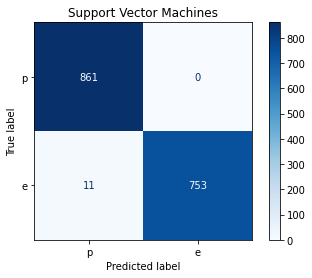

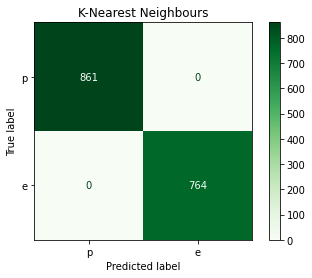

In [9]:
import matplotlib.pyplot as plt
metrics.plot_confusion_matrix(svm_classifier,
                              x_test, y_test,
                              display_labels=['p', 'e'],
                              cmap=plt.cm.Blues)
plt.title("Support Vector Machines")

metrics.plot_confusion_matrix(knn_classifier,
                              x_test, y_test,
                              display_labels=['p', 'e'],
                              cmap=plt.cm.Greens)
plt.title("K-Nearest Neighbours")
plt.show()